In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bangalore house price.csv')

In [3]:
df.shape

(7120, 108)

In [4]:
df.head()

,bath,balcony,price,total_sqft_int,bhk,price_per_sqft,area_typeSuper built-up Area,area_typeBuilt-up Area,area_typePlot Area,availability_Ready To Move,location_Whitefield,location_Sarjapur Road,location_Electronic City,location_Marathahalli,location_Raja Rajeshwari Nagar,location_Haralur Road,location_Hennur Road,location_Bannerghatta Road,location_Uttarahalli,location_Thanisandra,location_Electronic City Phase II,location_Hebbal,location_7th Phase JP Nagar,location_Yelahanka,location_Kanakpura Road,location_KR Puram,location_Sarjapur,location_Rajaji Nagar,location_Kasavanhalli,location_Bellandur,location_Begur Road,location_Banashankari,location_Kothanur,location_Hormavu,location_Harlur,location_Akshaya Nagar,location_Jakkur,location_Electronics City Phase 1,location_Varthur,location_Chandapura,...,location_Green Glen Layout,location_Old Madras Road,location_Rachenahalli,location_Panathur,location_Kudlu Gate,location_Thigalarapalya,location_Ambedkar Nagar,location_Jigani,location_Yelahanka New Town,location_Talaghattapura,location_Mysore Road,location_Kadugodi,location_Frazer Town,location_Dodda Nekkundi,location_Devanahalli,location_Kanakapura,location_Attibele,location_Anekal,location_Lakshminarayana Pura,location_Nagarbhavi,location_Ananth Nagar,location_5th Phase JP Nagar,location_TC Palaya,location_CV Raman Nagar,location_Kengeri Satellite Town,location_Kudlu,location_Jalahalli,location_Subramanyapura,location_Bhoganhalli,location_Doddathoguru,location_Kalena Agrahara,location_Horamavu Agara,location_Vidyaranyapura,location_BTM 2nd Stage,location_Hebbal Kempapura,location_Hosur Road,location_Horamavu Banaswadi,location_Domlur,location_Mahadevpura,location_Tumkur Road
0,3.0,2.0,150.0,1672.0,3,8971.291866,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,3.0,3.0,149.0,1750.0,3,8514.285714,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,3.0,2.0,150.0,1750.0,3,8571.428571,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,2.0,2.0,40.0,1250.0,2,3200.000000,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2.0,2.0,83.0,1200.0,2,6916.666667,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7120 entries, 0 to 7119
Columns: 108 entries, bath to location_Tumkur Road
dtypes: float64(5), int64(103)
memory usage: 5.9 MB


In [8]:
#### missing values
df.isnull().sum().sum()/len(df)

np.float64(0.0)

In [9]:
### duplicates
df.duplicated().sum()

np.int64(467)

In [10]:
df.drop_duplicates(inplace=True,ignore_index=True)

In [11]:
df.duplicated().sum()

np.int64(0)

In [13]:
float_col= [i for i in df.columns if df[i].dtype=='float']
float_col

['bath', 'balcony', 'price', 'total_sqft_int', 'price_per_sqft']

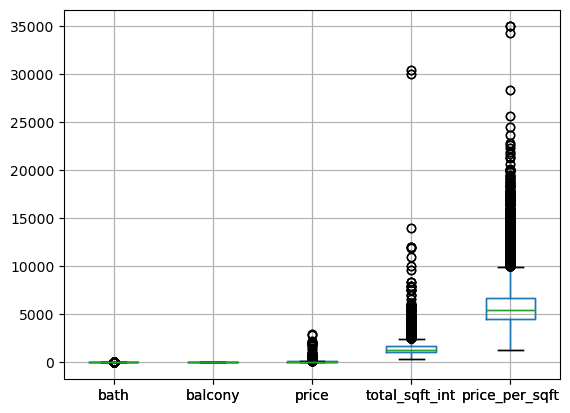

In [17]:
df[float_col].boxplot()
plt.show()

In [19]:
### outlier capping
def outlier_capping(df,column):
    Q1= df[column].quantile(0.25)
    Q3= df[column].quantile(0.75)
    IQR= Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

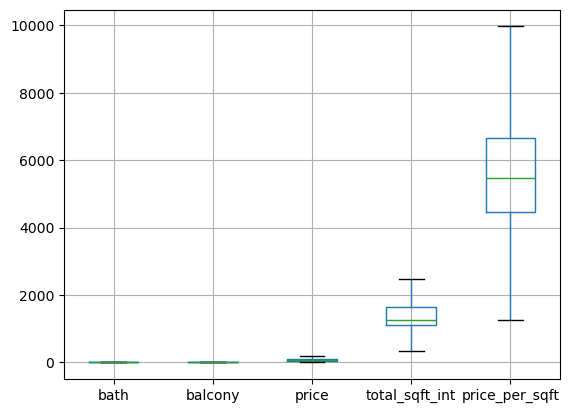

In [20]:
df[float_col].boxplot()
plt.show()

In [21]:
target=df[['price']]
features= df.drop(columns=['price'])

In [25]:
from sklearn.feature_selection import f_regression
f_reg=f_regression(features,target)
pd.Series(f_reg[0],index=features.columns).sort_values(ascending=False)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


total_sqft_int                 21558.029909
price_per_sqft                 12836.278100
bath                            8172.354902
bhk                             7027.756048
balcony                          345.847110
                                   ...     
location_Hosur Road                0.000000
location_Horamavu Banaswadi        0.000000
location_Domlur                    0.000000
location_Mahadevpura               0.000000
location_Tumkur Road               0.000000
Length: 107, dtype: float64

In [26]:
features.columns

Index(['bath', 'balcony', 'total_sqft_int', 'bhk', 'price_per_sqft',
       'area_typeSuper built-up  Area', 'area_typeBuilt-up  Area',
       'area_typePlot  Area', 'availability_Ready To Move',
       'location_Whitefield',
       ...
       'location_Kalena Agrahara', 'location_Horamavu Agara',
       'location_Vidyaranyapura', 'location_BTM 2nd Stage',
       'location_Hebbal Kempapura', 'location_Hosur Road',
       'location_Horamavu Banaswadi', 'location_Domlur',
       'location_Mahadevpura', 'location_Tumkur Road'],
      dtype='object', length=107)

In [31]:
x_train,x_test,y_train,y_test=train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4989, 107)
(1664, 107)
(4989, 1)
(1664, 1)


In [35]:
std_sca=StandardScaler()
x_train[['bath','total_sqft_int','price_per_sqft']]=std_sca.fit_transform(x_train[['bath','total_sqft_int','price_per_sqft']])

In [36]:
x_test[['bath','total_sqft_int','price_per_sqft']]=std_sca.transform(x_test[['bath','total_sqft_int','price_per_sqft']])

#### lasso

In [57]:
lasso=Lasso( alpha=1.0,max_iter=1000)

In [58]:
lasso.fit(x_train,y_train)

Lasso()

In [59]:
y_train_pred= lasso.predict(x_train)
y_test_pred= lasso.predict(x_test)
print('Training_Acc:',r2_score(y_train,y_train_pred))
print('Testing_Acc:',r2_score(y_test,y_test_pred))

Training_Acc: 0.963248571452638
Testing_Acc: 0.9546076814767226


In [60]:
print(lasso.coef_)

[ 0.88988024  0.         27.58693608  0.         22.90754252 -0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         

In [41]:
lasso.intercept_

array([83.77794247])

#### Ridge

In [67]:
ridge=Ridge(alpha=1,max_iter=1000)

In [68]:
ridge.fit(x_train,y_train)

Ridge(alpha=1, max_iter=1000)

In [70]:
y_train_pred= ridge.predict(x_train)
y_test_pred= ridge.predict(x_test)
print('Training_Acc:',r2_score(y_train,y_train_pred))
print('Testing_Acc:',r2_score(y_test,y_test_pred))

Training_Acc: 0.9642478296104902
Testing_Acc: 0.9565682758865681


In [69]:
ridge.coef_

array([ 1.62230272, -0.08234472, 27.88205657, -0.45976447, 23.53545099,
       -1.91363291,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

#### ElasticNet

In [78]:
elastic= ElasticNet(alpha=1,l1_ratio=0.5,max_iter=1000)
elastic.fit(x_train,y_train)
y_train_pred= elastic.predict(x_train)
y_test_pred= elastic.predict(x_test)
print('Training_Acc:',r2_score(y_train,y_train_pred))
print('Testing_Acc:',r2_score(y_test,y_test_pred))

Training_Acc: 0.9086669677391782
Testing_Acc: 0.8942010597758544


In [102]:
from sklearn.linear_model import LassoCV

In [103]:
lassocv=LassoCV(cv=5,max_iter=10000,alphas=None)

In [104]:
lassocv.fit(x_train,y_train)

LassoCV(cv=5, max_iter=10000)

In [105]:
best_alpha= lassocv.alpha_
best_alpha

np.float64(0.043568947626655564)

In [115]:
mean_cross_validation_error=lassocv.mse_path_.mean(axis=1)
mean_cross_validation_error

array([2136.19434938, 1938.22668458, 1746.97857835, 1538.27739007,
       1348.07252789, 1182.649423  , 1038.77806076,  913.65095338,
        804.82508126,  710.17506973,  627.86155494,  556.27156931,
        494.01124389,  439.86359034,  392.77170881,  351.81637671,
        316.19811465,  285.2215889 ,  258.28204543,  234.85351103,
        214.47853128,  196.75840266,  181.34608982,  167.94565047,
        156.29100309,  146.15687144,  137.34401459,  129.6802468 ,
        123.01581682,  117.22048413,  112.18098028,  107.79878875,
        103.98823237,  100.67479916,   97.79368675,   95.28854189,
         93.11091221,   91.22245858,   89.58256181,   88.15740569,
         86.91227948,   85.81375302,   84.85608912,   83.99731335,
         83.23684824,   82.57505934,   81.99930248,   81.49862709,
         81.06331691,   80.68486732,   80.35586682,   80.06986566,
         79.8212537 ,   79.60515183,   79.41731697,   79.25405927,
         79.11217003,   78.98885896,   78.88169972,   78.78858

In [116]:
alphas=lassocv.alphas_
alphas

array([40.63254638, 37.89404874, 35.34011669, 32.9583111 , 30.73703124,
       28.66545821, 26.73350226, 24.93175369, 23.25143693, 21.6843679 ,
       20.22291408, 18.85995735, 17.58885935, 16.4034291 , 15.29789288,
       14.2668661 , 13.30532707, 12.40859256, 11.57229495, 10.792361  ,
       10.06499199,  9.38664522,  8.75401675,  8.16402532,  7.61379733,
        7.10065288,  6.62209264,  6.17578576,  5.75955847,  5.3713835 ,
        5.00937023,  4.67175544,  4.35689476,  4.06325464,  3.78940487,
        3.53401167,  3.29583111,  3.07370312,  2.86654582,  2.67335023,
        2.49317537,  2.32514369,  2.16843679,  2.02229141,  1.88599574,
        1.75888594,  1.64034291,  1.52978929,  1.42668661,  1.33053271,
        1.24085926,  1.1572295 ,  1.0792361 ,  1.0064992 ,  0.93866452,
        0.87540167,  0.81640253,  0.76137973,  0.71006529,  0.66220926,
        0.61757858,  0.57595585,  0.53713835,  0.50093702,  0.46717554,
        0.43568948,  0.40632546,  0.37894049,  0.35340117,  0.32

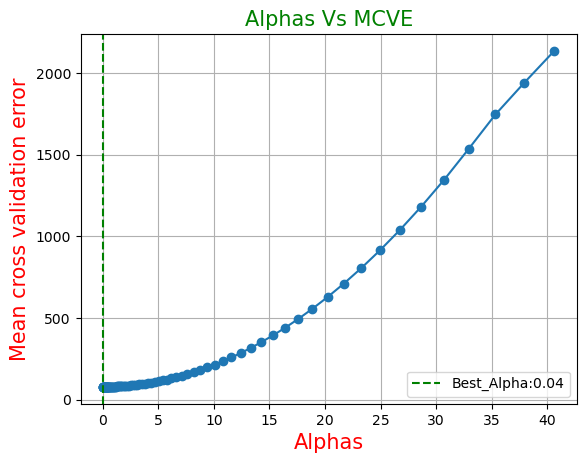

In [123]:
plt.plot(alphas,mean_cross_validation_error,marker='o')
plt.axvline(best_alpha,color='green',linestyle='--',label=f'Best_Alpha:{best_alpha:.2f}')
plt.xlabel('Alphas',color='red',size=15)
plt.ylabel('Mean cross validation error',color='red',size=15)
plt.title('Alphas Vs MCVE',size=15,color='green')
plt.grid()
plt.legend()
plt.show();